In [1]:
import json
import numpy as np
import cv2
from itertools import groupby 
data_root = '/home/ubuntu/data/nuScenes_small/nuscenes_small/'
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
anno_pth = '/home/ubuntu/data/nuScenes_small/annotations/val.json'
with open(anno_pth) as f:
    nusc = json.load(f)

In [3]:
nusc['categories'] = {d['id']: d for d in nusc['categories']}
nusc['categories']

{1: {'name': 'car', 'id': 1},
 2: {'name': 'truck', 'id': 2},
 3: {'name': 'bus', 'id': 3},
 4: {'name': 'trailer', 'id': 4},
 5: {'name': 'construction_vehicle', 'id': 5},
 6: {'name': 'pedestrian', 'id': 6},
 7: {'name': 'motorcycle', 'id': 7},
 8: {'name': 'bicycle', 'id': 8},
 9: {'name': 'traffic_cone', 'id': 9},
 10: {'name': 'barrier', 'id': 10}}

In [4]:
nusc['annotations'] = sorted(nusc['annotations'], key=lambda k: k['image_id'])
# sample_data = [[k, list(v)]for k, v in groupby(nusc['annotations'], lambda k: k['image_id'])]
sample_data = groupby(nusc['annotations'], lambda k: k['image_id'])
nusc['images'] = {d['id']: d for d in nusc['images']}


In [5]:
for img_id, anno_data in groupby(nusc['annotations'], lambda k: k['image_id']):
    for anno in anno_data:
        print(anno)
        break
    break


{'id': 1, 'image_id': 1, 'category_id': 6, 'dim': [1.78, 0.695, 1.095], 'location': [-23.294074801418212, 0.21029159772891837, 38.660724850969736], 'depth': 38.660724850969736, 'occluded': 0, 'truncated': 0, 'rotation_y': 0.29744093834382296, 'iscrowd': 0, 'track_id': 1, 'attributes': 3, 'velocity': [1.5950093713765197, 0.03495035861476262, -0.5793721234687697, 0.0], 'bbox': [28.882221356088465, 439.5310324372731, 48.46771006740978, 59.362590003769924], 'area': 2877.1688011532387, 'alpha': 0.8397154063529615, 'keypoints': [76.9863510131836, 498.36517333984375, 2.0, 57.357566833496094, 498.48455810546875, 2.0, 29.238048553466797, 498.4263916015625, 2.0, 49.18317413330078, 498.3089599609375, 2.0, 76.9863510131836, 440.3152770996094, 2.0, 57.357566833496094, 439.424072265625, 2.0, 29.238048553466797, 439.85833740234375, 2.0, 49.18317413330078, 440.7348937988281, 2.0, 53.21828079223633, 469.24169921875, 2.0], 'num_keypoints': 9.0}


In [12]:
nusc['images'][1]

{'id': 1,
 'file_name': 'samples/CAM_FRONT/n015-2018-08-02-17-16-37+0800__CAM_FRONT__1533201470412460.jpg',
 'calib': [[1266.417236328125, 0.0, 816.2670288085938, 0.0],
  [0.0, 1266.417236328125, 491.507080078125, 0.0],
  [0.0, 0.0, 1.0, 0.0]],
 'video_id': 1,
 'frame_id': 1,
 'sensor_id': 1,
 'sample_token': 'fd8420396768425eabec9bdddf7e64b6',
 'trans_matrix': [[-0.10434384872723422,
   -0.011687361553491345,
   0.9944726073717197,
   251.60143073940714],
  [-0.9943721940227057,
   -0.017211902718695278,
   -0.10453559278673233,
   917.4057424469487],
  [0.01833851104259638,
   -0.9997835545680479,
   -0.00982563117669435,
   1.5034833888898147],
  [0.0, 0.0, 0.0, 1.0]],
 'width': 1600,
 'height': 900,
 'pose_record_trans': [249.90018228466124, 917.5514452794962, 0.0],
 'pose_record_rot': [0.9984397071954904,
  -0.008652973321832425,
  0.002523596051210081,
  -0.05510815376190409],
 'cs_record_trans': [1.70079118954, 0.0159456324149, 1.51095763913],
 'cs_record_rot': [0.49980154305691

In [24]:

al_hw = np.array([
    [anno['bbox'][2] - anno['bbox'][0], anno['bbox'][3] - anno['bbox'][1]]
    for anno in nusc['annotations']
])
    

In [25]:
al_hw[0]

array([  19.58548871, -380.16844243])

In [17]:
anno = nusc['annotations'][0]
anno

{'id': 1,
 'image_id': 1,
 'category_id': 6,
 'dim': [1.78, 0.695, 1.095],
 'location': [-23.294074801418212, 0.21029159772891837, 38.660724850969736],
 'depth': 38.660724850969736,
 'occluded': 0,
 'truncated': 0,
 'rotation_y': 0.29744093834382296,
 'iscrowd': 0,
 'track_id': 1,
 'attributes': 3,
 'velocity': [1.5950093713765197,
  0.03495035861476262,
  -0.5793721234687697,
  0.0],
 'bbox': [28.882221356088465,
  439.5310324372731,
  48.46771006740978,
  59.362590003769924],
 'area': 2877.1688011532387,
 'alpha': 0.8397154063529615,
 'keypoints': [76.9863510131836,
  498.36517333984375,
  2.0,
  57.357566833496094,
  498.48455810546875,
  2.0,
  29.238048553466797,
  498.4263916015625,
  2.0,
  49.18317413330078,
  498.3089599609375,
  2.0,
  76.9863510131836,
  440.3152770996094,
  2.0,
  57.357566833496094,
  439.424072265625,
  2.0,
  29.238048553466797,
  439.85833740234375,
  2.0,
  49.18317413330078,
  440.7348937988281,
  2.0,
  53.21828079223633,
  469.24169921875,
  2.0],
 

In [5]:
from collections import defaultdict


In [10]:
sample_token_count = defaultdict(int)
for k, v in nusc['images'].items():
    sample_token_count[v['sample_token']] += 1

for k, v in sample_token_count.items():
    if v != 1:
        print(k, v)

fd8420396768425eabec9bdddf7e64b6 6
6eb8a3ff0abf4f3a9380a48f2a0b87ef 6
b10f0cd792b64d16a1a5e8349b20504c 6
163b70e627854893b88575caf85a56ea 6
f56a544064a548a39a81f18cc8f633c5 6
f286cdaef36648cba3b6a24d2178dc8a 6
877f55a6d8324fefb5e0f5e0bac3d7c1 6
49f8376cd6b34f07b20ed6d5b5b42acd 6
cc50000970584ba5aaf14760b1ced696 6
21b99febc5c14f7385e787fe81e96670 6
cd908fdce67249f3a8a14b987f00592e 6
6b9af38cbf654171870cb14b4ae89fd6 6
a0edf6edd121431785948038c54e036e 6
9281ea172d9e43528e65fca81e2006d4 6
6180726fc8744ea2b129ebaad6f79cee 6
1ac0914c98b8488cb3521efeba354496 6
2f5de0aeca704127925cf8490ff5a21d 6
e4df3ac5874d49b7a3553035cd735902 6
dc878ebb5b1e43eb9442d9361854613e 6
e617edf72860495abd928aaf57dfa5fa 6
7c0aa537b98344bea85226ba8148ae98 6
02651ca22b08484294d473d9c26cd9af 6
37b3d16060b442d5b6175cbebefd09a7 6
9c75ddb5976343c3b7b33e8148d3eeb0 6
5e4e25f87ec84942ac459a55fe064330 6
c1ab33c3994041ceae32b0fe1b51e611 6
23dc1b528c734082b8b3bfd9757f0eb3 6
3064a6b9b3f04e5d8e51eefb4be8506a 6
1c8ec6c1dd614d3fb8b8

In [74]:

anno = nusc['annotations'][12]
image = mpimg.imread(data_root + nusc['images'][anno['image_id']]['file_name'])
print(anno)
print(nusc['categories'][anno['category_id']])

{'id': 13, 'image_id': 2, 'category_id': 6, 'dim': [1.862, 0.703, 0.843], 'location': [-7.901369509235196, 1.5081038856444393, 16.15539063137317], 'depth': 16.15539063137317, 'occluded': 0, 'truncated': 0, 'rotation_y': 1.2249890174189915, 'iscrowd': 0, 'track_id': 10, 'attributes': 3, 'velocity': [0.36483542826305077, 0.0030823562533433633, -1.2065588146764643, 0.0], 'bbox': [155.5736795782709, 466.7947959056702, 69.25882830883472, 150.10279098374735], 'area': 10395.943429420262, 'alpha': 1.6798670702570495, 'keypoints': [218.13699340820312, 615.0907592773438, 2.0, 155.83062744140625, 616.9153442382812, 2.0, 165.380615234375, 611.0474853515625, 2.0, 224.58641052246094, 609.3934936523438, 2.0, 218.13699340820312, 467.2320251464844, 2.0, 155.83062744140625, 466.8038635253906, 2.0, 165.380615234375, 468.18084716796875, 2.0, 224.58641052246094, 468.5689697265625, 2.0, 191.30589294433594, 540.3744506835938, 2.0], 'num_keypoints': 9.0}
{'name': 'pedestrian', 'id': 6}


[155.5736795782709, 466.7947959056702, 69.25882830883472, 150.10279098374735]


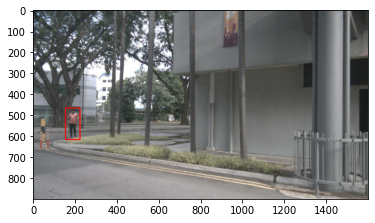

In [75]:
cx, cy, w, h = anno['bbox']
print(anno['bbox'])
xmin = int(cx )
xmax = int(xmin + w)
ymin = int(cy)
ymax = int(ymin + h)

# xmin = int(cx )
# ymin = int(cy)
# xmax = int(w)
# ymax = int(h)


cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 3)
plt.imshow(image)

In [49]:
xmin

17